# 探索房屋数据集

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('house_data.csv')

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 可视化房屋数据集的特征

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [23]:
sns.set(context = 'notebook')

In [24]:
cols = ['LSTAT', 'AGE', 'DIS', 'CRIM', 'MEDV', 'TAX', 'RM']

In [25]:
sns.pairplot(df[cols], size=2.5)

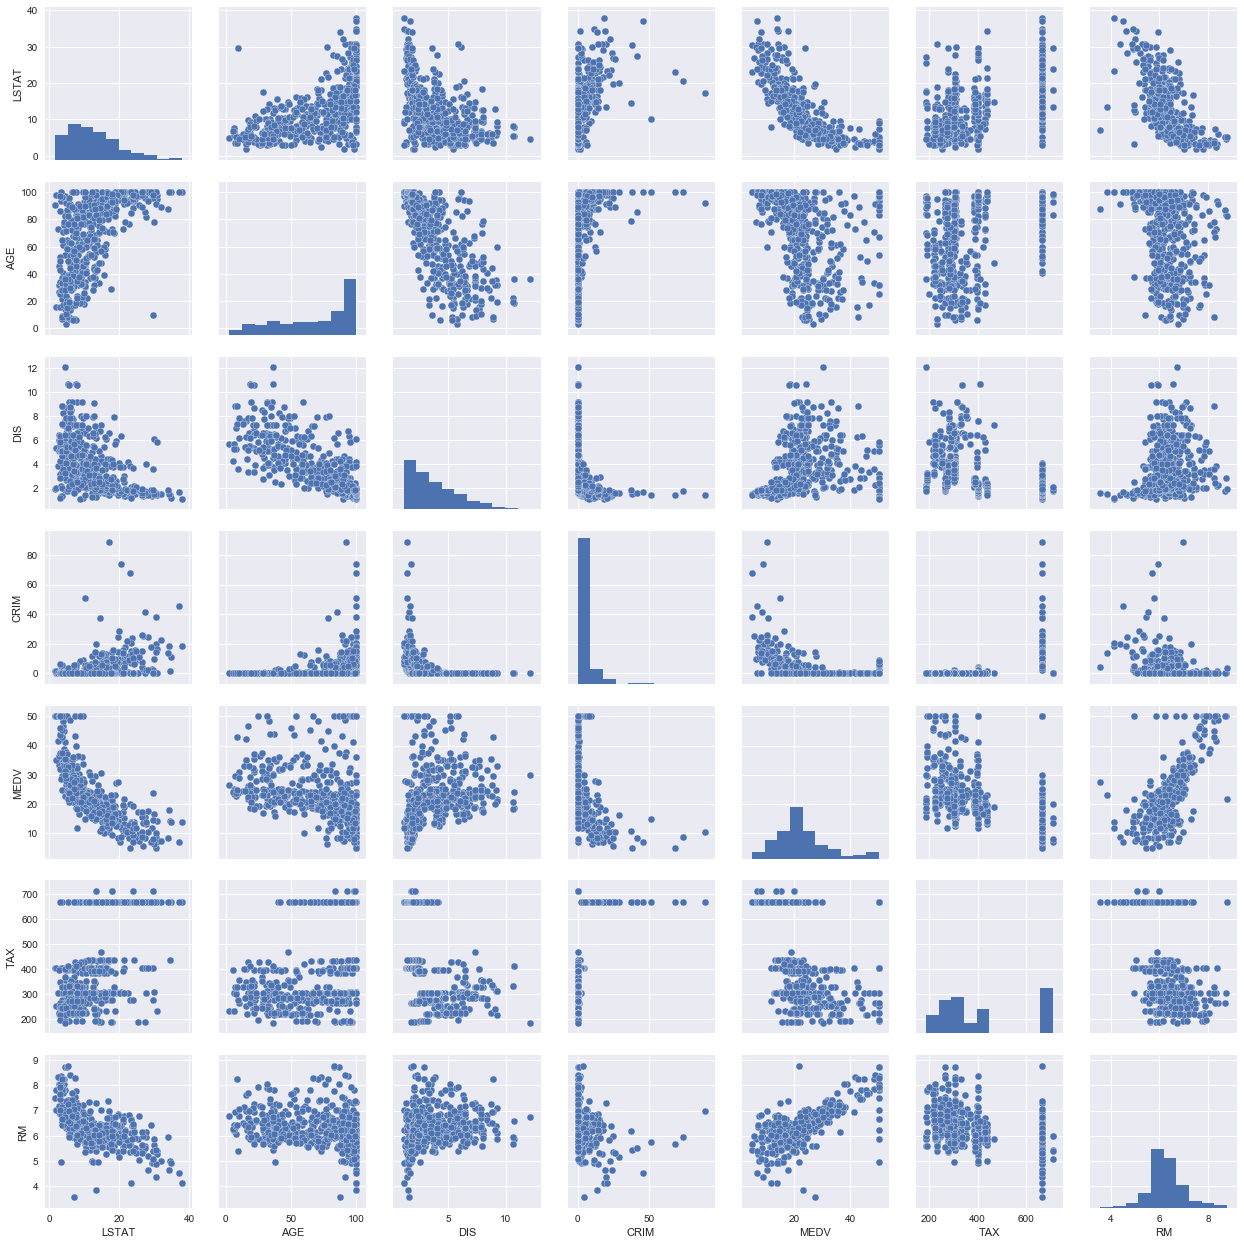

In [26]:
plt.show()

# 实现线性回归模型

## 通过梯度下降法计算回归参数，实现线性回归模型

In [27]:
import numpy as np

In [46]:
class LinearRegressionByMyself(object):
    def __init__(self, Learning_rate=0.001, epoch=20):
        self.Learning_rate = Learning_rate
        self.epoch = epoch
        
    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        self.cost_list = []
        
        for i in range(self.epoch):
            output = self.Regression_input(X)
            error = (y - output)
            self.w[1:] += self.Learning_rate * X.T.dot(error)
            self.w[0] += self.Learning_rate * error.sum()
            cost = (error ** 2).sum() / 2.0
            self.cost_list.append(cost)
        return self
    
    def Regression_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return self.Regression_input(X)

In [47]:
X = df[['LSTAT']].values

In [48]:
y = df['MEDV'].values

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
StandardScaler_x = StandardScaler()

In [51]:
StandardScaler_y = StandardScaler()

In [52]:
X_Standard = StandardScaler_x.fit_transform(X)

In [53]:
y_Standard = StandardScaler_y.fit_transform(y)

/Users/heavenyu1982/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/heavenyu1982/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [54]:
model = LinearRegressionByMyself()

In [55]:
model.fit(X_Standard, y_Standard)

In [56]:
plt.plot(range(1, model.epoch+1), model.cost_list)

In [57]:
plt.ylabel('SSE')

In [58]:
plt.xlabel('Epoch')

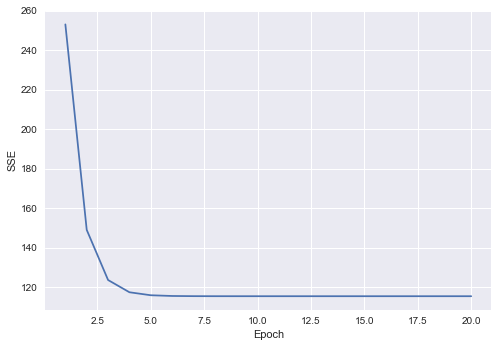

In [59]:
plt.show()

In [60]:
def Regression_plot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

In [61]:
Regression_plot(X_Standard, y_Standard, model)

In [62]:
plt.xlabel('Percentage of the population')

In [63]:
plt.ylabel('House price')

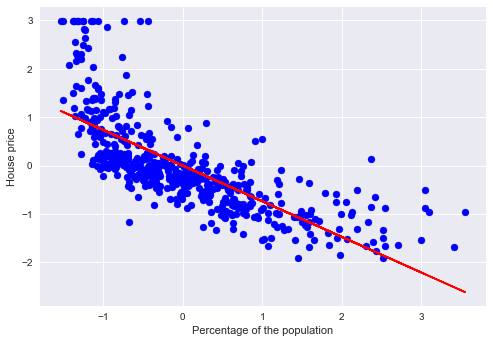

In [64]:
plt.show()

In [65]:
Rercentage_standard = StandardScaler_x.transform([2.5])

/Users/heavenyu1982/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [66]:
Price_standard = model.predict(Rercentage_standard)

In [67]:
print("House price: %.3f" % \
     StandardScaler_y.inverse_transform(Price_standard))

House price: 32.179


In [68]:
print('Slope: %.3f' % model.w[1])

Slope: -0.738


In [69]:
print('Intercept: %.3f' % model.w[0])

Intercept: -0.000


# 使用sklearn来构建回归模型

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
sk_model = LinearRegression()

In [74]:
sk_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print('Slope: %.3f' % sk_model.coef_[0])

Slope: -0.950


In [76]:
print('Inercept: %.3f' % sk_model.intercept_)

Inercept: 34.554


In [77]:
Regression_plot(X, y, sk_model)

In [78]:
plt.xlabel('Percentage of the population')

In [79]:
plt.ylabel('House price')

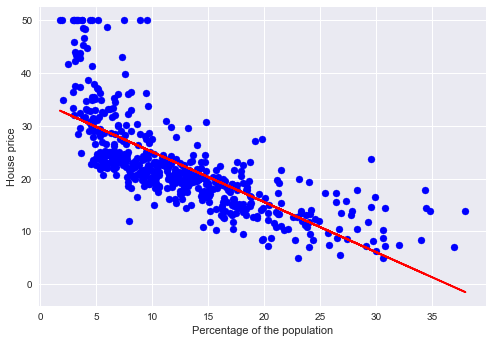

In [80]:
plt.show()

# 评估线性回归模型

In [84]:
from sklearn.cross_validation import train_test_split

In [85]:
cols = ['LSTAT', 'AGE', 'DIS', 'CRIM', 'TAX', 'RM']

In [86]:
X = df[cols].values

In [87]:
y = df['MEDV'].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [89]:
sk_model = LinearRegression()

In [90]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
y_train_predict = sk_model.predict(X_train)

In [92]:
y_test_predict = sk_model.predict(X_test)

In [93]:
plt.scatter(y_train_predict, y_train_predict - y_train, c='red', marker='x', label='Training data')

In [94]:
plt.scatter(y_test_predict, y_test_predict - y_test, c='black', marker='o', label='Test data')

In [95]:
plt.xlabel('Predicted values')

In [96]:
plt.ylabel('Residuals')

In [97]:
plt.legend(loc='upper left')

In [98]:
plt.hlines(y=0, xmin=-10, xmax=50, lw=1, color='green')

In [99]:
plt.xlim([-10, 50])

(-10, 50)

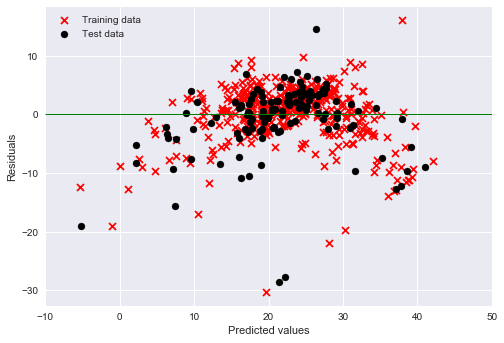

In [100]:
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
print('MSE train %.3f, test %.3f' % (
    mean_squared_error(y_train, y_train_predict),
    mean_squared_error(y_test, y_test_predict)))

MSE train 25.106, test 36.671


In [103]:
from sklearn.metrics import r2_score

In [104]:
print('R^2 train %.3f, test %.3f' % (
    r2_score(y_train, y_train_predict),
    r2_score(y_test, y_test_predict)))

R^2 train 0.706, test 0.551


# 建模房屋数据集里的非线性关系

In [109]:
X = df[['RM']].values

In [110]:
y = df['MEDV'].values

In [111]:
Regression_model = LinearRegression()

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
quadratic = PolynomialFeatures(degree=2)

In [114]:
cubic = PolynomialFeatures(degree=3)

In [115]:
X_squared = quadratic.fit_transform(X)

In [116]:
X_cubic = cubic.fit_transform(X)

In [118]:
X_fit = np.arange(X.min(), X.max(), 0.01)[: , np.newaxis]

In [119]:
Linear_model = Regression_model.fit(X, y)

In [120]:
y_line_fit = Linear_model.predict(X_fit)

In [121]:
linear_r2 = r2_score(y, Linear_model.predict(X))

In [122]:
Squared_model = Regression_model.fit(X_squared, y)

In [124]:
y_quad_fit = Squared_model.predict(quadratic.fit_transform(X_fit))

In [125]:
quadratic_r2 = r2_score(y, Squared_model.predict(X_squared))

In [126]:
Cubic_model = Regression_model.fit(X_cubic, y)

In [127]:
y_cubic_fit = Cubic_model.predict(cubic.fit_transform(X_fit))

In [128]:
cubic_r2 = r2_score(y, Cubic_model.predict(X_cubic))

In [129]:
plt.scatter(X, y, label='Training point', color='lightgray')

In [130]:
plt.plot(X_fit, y_line_fit, label='linear, $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')

In [131]:
plt.plot(X_fit, y_quad_fit, label='quadratic, $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')

In [132]:
plt.plot(X_fit, y_cubic_fit, label='cubic, $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')

In [133]:
plt.xlabel('Room number')

In [134]:
plt.ylabel('House price')

In [135]:
plt.legend(loc='upper left')

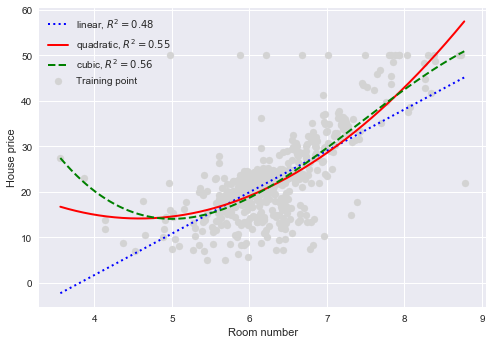

In [136]:
plt.show()